In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
influencer = pd.read_csv('dataInfluencer.csv', delimiter=',')

In [14]:
aturan = pd.read_csv('rules.csv', delimiter=',')

In [15]:
aturan

,followerCount/engagementRate,rendah,sedang,tinggi
0,rendah,tidak,tidak,tidak
1,sedang,tidak,iya,iya
2,tinggi,tidak,iya,iya


In [16]:
influencer['followerCount'].quantile([0.2, 0.4, 0.6, 0.8, 1]).values

array([11590.8, 19795.8, 29004.4, 43904. , 95117. ])

In [17]:
influencer['engagementRate'].quantile([0.3, 0.6, 0.9, 1]).values

array([0.97, 2.5 , 4.93, 9.4 ])

In [5]:
def batas(data,a,b,c,d):
    if(data <= a) or (data>=d):
        return 0
    elif (a < data) and (data < b):
        return (data-a)/(b-a)
    elif (b <= data) and (data <= c):
        return 1
    elif (c < data) and (data <= d):
        return -(data-d)/(d-c)

In [11]:
def grafikfollowers():
    t = np.arange(0.0, 95118, 1)
    rendah = []
    sedang = []
    tinggi = []
    for i in range(0, len(t)):
        rendah.append(batas(t[i], -1, -1, 11590.8 , 19795.8))
        sedang.append(batas(t[i], 11590.8 , 19795.8, 29004.4, 43904))
        tinggi.append(batas(t[i], 29004.4, 43904, 95118, 95118))
    plt.figure(figsize=(20,5))
    plt.plot(t, rendah, color='r')
    plt.plot(t, sedang, color='g')
    plt.plot(t, tinggi, color='b')
    plt.show

In [18]:
def grafikEngagement():
    t = np.arange(0.0, 10, 0.01)
    rendah = []
    sedang = []
    tinggi = []
    for i in range(0, len(t)):
        rendah.append(batas(t[i], -1, -1, 0.97 , 2.5))
        sedang.append(batas(t[i], 0.97 , 2.5, 4.93, 9.4))
        tinggi.append(batas(t[i], 4.93, 9.4, 10.0, 10.0))
    plt.figure(figsize=(20,5))
    plt.plot(t, rendah, color='r')
    plt.plot(t, sedang, color='g')
    plt.plot(t, tinggi, color='b')
    plt.show

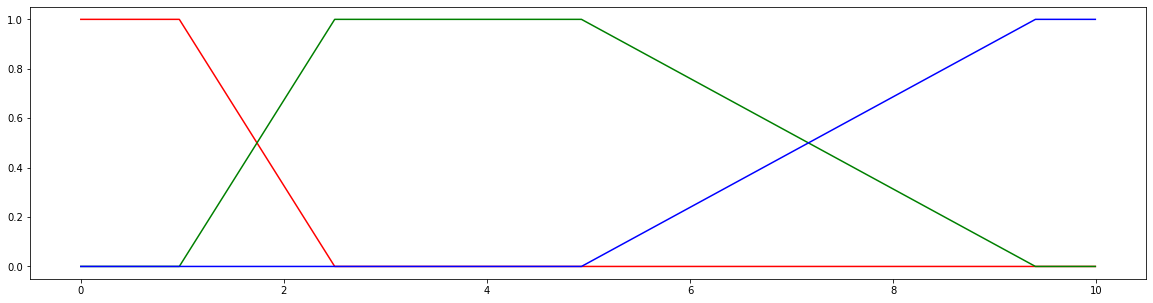

In [19]:
grafikEngagement()

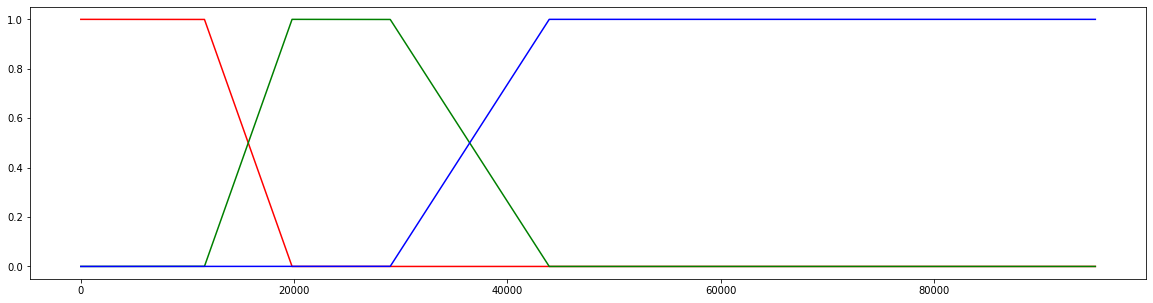

In [12]:
grafikfollowers()

In [20]:
def fuzzyficationFollower(followers):
    fRendah = 11590.8
    fSedang = 19795.8
    fMenengah = 29004.4
    fTinggi = 43904
    
    
    hasil = []
    
    for follower in followers:
        rendah = batas(follower, -1, -1, fRendah , fSedang)
        sedang = batas(follower, fRendah , fSedang, fMenengah , fTinggi)
        tinggi = batas(follower, fMenengah , fTinggi, 95118, 95118)
        hasil.append((rendah, sedang, tinggi))
    return hasil

In [21]:
def fuzzyficationEngagement(engagements):
    eRendah = 0.97
    eSedang = 2.5
    eMenengah = 4.93
    eTinggi = 9.4
    
    hasil = []
    
    for engagement in engagements:
        rendah = (batas(engagement, -1, -1, eRendah , eSedang))
        sedang = (batas(engagement, eRendah , eSedang, eMenengah, eTinggi))
        tinggi = (batas(engagement, eMenengah, eTinggi, 10, 10))
        hasil.append((rendah, sedang, tinggi))
    return hasil

In [22]:
def inference(follower, engagement):
    aturan =  pd.read_csv('rules.csv', delimiter = ',')
    i = 0
    acc = [0]
    no = [0]
    for rendah, sedang, tinggi in zip(aturan['rendah'].values, aturan['sedang'].values, aturan['tinggi'].values):
        if (rendah == 'iya'):
            acc.append(min(follower[i], engagement[0]))
        else:
            no.append(min(follower[i], engagement[0]))
        if (sedang == 'iya'):
            acc.append(min(follower[i], engagement[1]))
        else:
            no.append(min(follower[i], engagement[1]))
        if(tinggi == 'iya'):
            acc.append(min(follower[i], engagement[2]))
        else:
            no.append(min(follower[i], engagement[2]))
        i += 1
    return max(acc), max(no)

In [23]:
def defuzzyfication(acc, no):
    batasTidak = 30
    batasYa = 90
    return (acc*batasYa+no*batasTidak)/(acc+no)

In [24]:
follower = fuzzyficationFollower(influencer['followerCount'].values)
engagement = fuzzyficationEngagement(influencer['engagementRate'].values)
hasil = []
for foll, en in zip(follower, engagement):
    ya, tidak = inference(foll, en)
    result = defuzzyfication(ya, tidak)
    hasil.append(result)
terbaik = np.argpartition(hasil, -20)[-20:]+1
print("Influencer terbaik dengan id : ",terbaik)

Influencer terbaik dengan id :  [91 93 61 36 60 80 48 78 76 75 74 73 72 71  2 51 53 67 59 41]


In [25]:
np.savetxt('chosen.txt', terbaik, fmt="%i")